## TalkingData  Adtracking Fraud Detection
#### Exploratory Data Analysis
* Checking null data
* Checking Variable Distribution
* Checking Correalation Plot



https://www.kaggle.com/c/talkingdata-adtracking-fraud-detection#

In [1]:
import tensorflow as tf
import os
import dask.dataframe as dd
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline

In [2]:
root = r'D:/data/2_FraudDetection/raw_data'
train_fname ='train.csv'
test_fname = 'test.csv'

In [3]:
p = 0.1  # 0.1% of the lines
# keep the header, then take only 1% of lines
# if random from [0,1] interval is greater than 0.01 the row will be skipped
df_train = pd.read_csv(os.path.join(root,train_fname), header=0, skiprows=lambda i: i>0 and random.random() > p, parse_dates = ["click_time"])

In [5]:
#df_train =  pd.read_csv(os.path.join(root,train_fname), nrows = 10000000 ,parse_dates=["click_time"])
# df_train = pd.read_csv(os.path.join(root,train_fname) ,parse_dates=["click_time"])

In [4]:
df_test = pd.read_csv(os.path.join(root,test_fname), parse_dates = ["click_time"])

In [5]:
df_train.shape

(18488889, 8)

In [6]:
df_train.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,134575,3,1,13,379,2017-11-06 14:43:10,NaN,0
1,73503,3,1,18,379,2017-11-06 14:49:43,NaN,0
2,74715,3,1,19,379,2017-11-06 14:55:25,NaN,0
3,153492,3,1,17,379,2017-11-06 15:03:11,NaN,0
4,192796,3,1,19,379,2017-11-06 15:07:24,NaN,0


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18488889 entries, 0 to 18488888
Data columns (total 8 columns):
ip                 int64
app                int64
device             int64
os                 int64
channel            int64
click_time         object
attributed_time    object
is_attributed      int64
dtypes: int64(6), object(2)
memory usage: 1.1+ GB


In [8]:
df_train.describe()

,ip,app,device,os,channel,is_attributed
count,1.848889e+07,1.848889e+07,1.848889e+07,1.848889e+07,1.848889e+07,1.848889e+07
mean,9.088391e+04,1.201577e+01,2.181449e+01,2.269752e+01,2.685599e+02,2.459207e-03
std,6.954100e+04,1.483718e+01,2.599262e+02,5.539180e+01,1.295876e+02,4.952938e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.024500e+04,3.000000e+00,1.000000e+00,1.300000e+01,1.400000e+02,0.000000e+00
50%,7.964000e+04,1.200000e+01,1.000000e+00,1.800000e+01,2.580000e+02,0.000000e+00
75%,1.182380e+05,1.500000e+01,1.000000e+00,1.900000e+01,3.790000e+02,0.000000e+00
max,3.647780e+05,7.680000e+02,4.225000e+03,9.280000e+02,4.980000e+02,1.000000e+00


In [9]:
df_train.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,134575,3,1,13,379,2017-11-06 14:43:10,NaN,0
1,73503,3,1,18,379,2017-11-06 14:49:43,NaN,0
2,74715,3,1,19,379,2017-11-06 14:55:25,NaN,0
3,153492,3,1,17,379,2017-11-06 15:03:11,NaN,0
4,192796,3,1,19,379,2017-11-06 15:07:24,NaN,0


* Checking null

In [10]:
df_train.isnull().sum()

ip                        0
app                       0
device                    0
os                        0
channel                   0
click_time                0
attributed_time    18443421
is_attributed             0
dtype: int64

 http://www.racketracer.com/2016/07/06/pandas-in-parallel/
    parallelize_dataframe

In [15]:
## Changing click_time -> Year Date Day Time

df_train['attributed_time'] = pd.to_datetime(df_train['attributed_time'])
df_train['click_time'] = pd.to_datetime(df_train['click_time'])

df_train['year'] = df_train.click_time.apply(lambda t: t.year)
df_train['weekday'] = df_train.click_time.apply(lambda t: t.weekday())
df_train['hour'] = df_train.click_time.apply(lambda t: t.hour)

df_test['year'] = df_test.click_time.apply(lambda t: t.year)
df_test['weekday'] = df_test.click_time.apply(lambda t: t.weekday())
df_test['hour'] = df_test.click_time.apply(lambda t: t.hour)




In [16]:
df_train.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,year,weekday,hour
0,134575,3,1,13,379,2017-11-06 14:43:10,NaT,0,2017,0,14
1,73503,3,1,18,379,2017-11-06 14:49:43,NaT,0,2017,0,14
2,74715,3,1,19,379,2017-11-06 14:55:25,NaT,0,2017,0,14
3,153492,3,1,17,379,2017-11-06 15:03:11,NaT,0,2017,0,15
4,192796,3,1,19,379,2017-11-06 15:07:24,NaT,0,2017,0,15


### Pie Plot of Categorical Variable

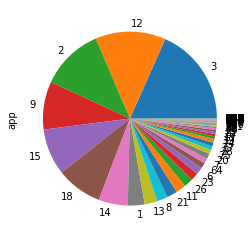

In [17]:
## Pie plot only the top categories and put in others

pd.value_counts(df_train['app']).plot.pie()

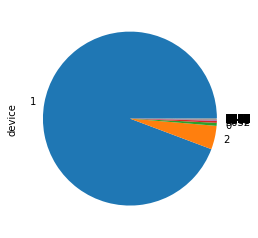

In [18]:
pd.value_counts(df_train['device']).plot.pie()

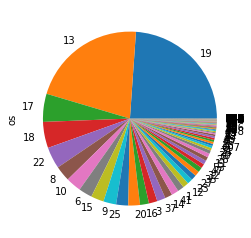

In [19]:
pd.value_counts(df_train['os']).plot.pie()

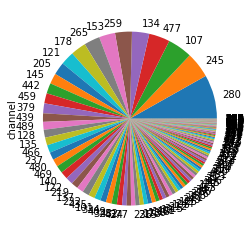

In [20]:
pd.value_counts(df_train['channel']).plot.pie()

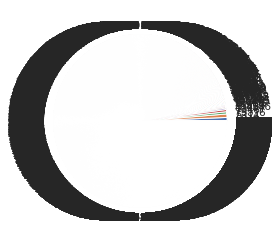

In [44]:
pd.value_counts(df_train['ip']).plot.pie()

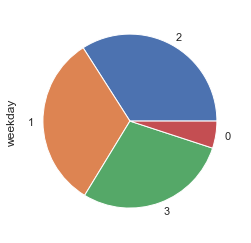

In [32]:
pd.value_counts(df_train['weekday']).plot.pie()

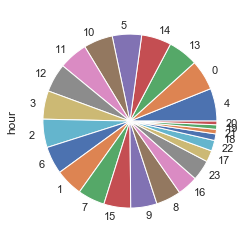

In [33]:
pd.value_counts(df_train['hour']).plot.pie()

### Bar plot for label

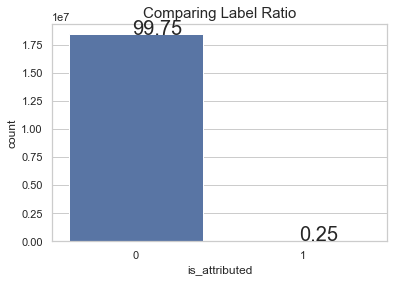

In [21]:
## Sea born barplot example
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import seaborn as sns

nrow = df_train.shape[0]

sns.set(style="whitegrid")

#sns.set_color_codes("Spectral")
ax = sns.countplot(x='is_attributed',
                   data=df_train)

ax.set_title('Comparing Label Ratio', fontsize= 15)


for p, label in zip(ax.patches, round(df_train["is_attributed"].value_counts()/nrow,4)*100 ):
    ax.annotate(label, (p.get_x()+0.375, p.get_height()+0.15), fontsize = 20)
    

* 데이터 imbalance 문제가 심각
* 불균형을 맞추기 위한 전략 필요

In [22]:
def VisualizeTopBar(visuailize_col, top=30):
    
    ## is_attributed == 1인 데이터만 우선 subset하자

    ## 1. 필요한 칼럼만 담은 데이터 프레임 만들기
    visualize_data = df_train[['is_attributed',visuailize_col]][df_train.is_attributed == 1]
    total = visualize_data.shape[0]

    ## 2. top10index 가져오기 (갯수가 가장 많은 상위 10개 값들)
    top10index = pd.value_counts(visualize_data[visuailize_col]).index[:top]

    ## 3. Subset하기
    top10_df = visualize_data.loc[visualize_data[visuailize_col].isin(top10index)]

    ## 4. 시각화
    #ax = sns.barplot(x="app", y="is_attributed", hue="app", data=top10_df)
    ## 오래 걸리고 안 됨..
    #ax = sns.barplot(x="app", data=top10_df)

    top10_df_sum = top10_df.groupby([visuailize_col])['is_attributed'].sum().reset_index()
    top10_df_sum['is_attributed'] = top10_df_sum['is_attributed']/total


    return sns.barplot(x=visuailize_col,y='is_attributed',data=top10_df_sum,
           order= top10_df_sum.sort_values(by=['is_attributed'],ascending =False)[visuailize_col]).set_title("Label ratio per top 30 " + visuailize_col)

Text(0.5, 1.0, 'Label ratio per top 30 app')

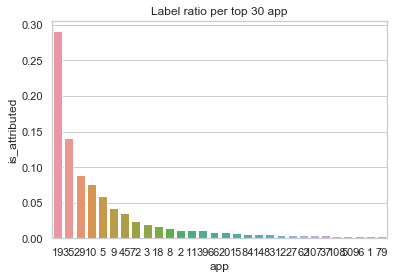

In [23]:
VisualizeTopBar('app')

19,35,29 어플해서 절반 이상 차지

Text(0.5, 1.0, 'Label ratio per top 30 device')

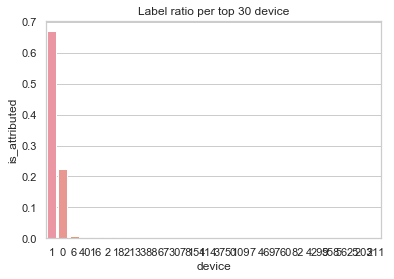

In [24]:
VisualizeTopBar('device')

device 종류는 많지만 실제로는 2 종류의 device가 대다수 차지

Text(0.5, 1.0, 'Label ratio per top 30 os')

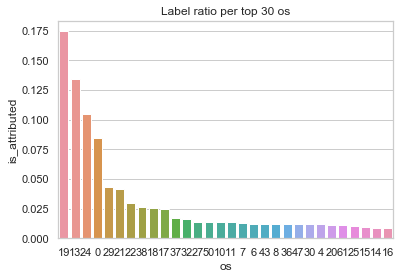

In [25]:
VisualizeTopBar('os')

os는 비교적 다른 데이터 보다 고르게 분포되어 있음

Text(0.5, 1.0, 'Label ratio per top 30 channel')

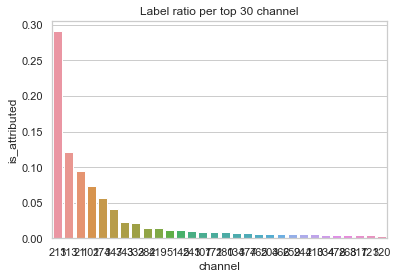

In [26]:
VisualizeTopBar('channel')

In [27]:
df_train.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,year,weekday,hour
0,134575,3,1,13,379,2017-11-06 14:43:10,NaT,0,2017,0,14
1,73503,3,1,18,379,2017-11-06 14:49:43,NaT,0,2017,0,14
2,74715,3,1,19,379,2017-11-06 14:55:25,NaT,0,2017,0,14
3,153492,3,1,17,379,2017-11-06 15:03:11,NaT,0,2017,0,15
4,192796,3,1,19,379,2017-11-06 15:07:24,NaT,0,2017,0,15


Text(0.5, 1.0, 'Label ratio per top 30 hour')

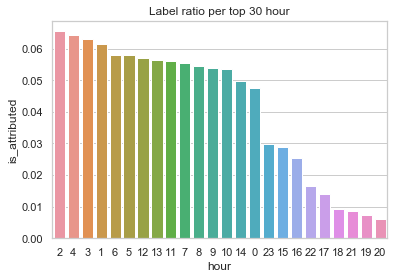

In [28]:
VisualizeTopBar('hour')

Text(0.5, 1.0, 'Label ratio per top 30 weekday')

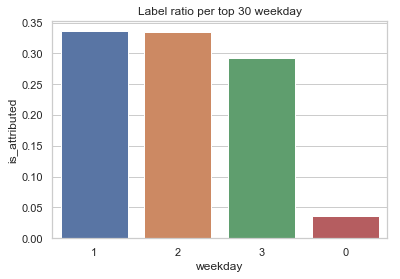

In [29]:
VisualizeTopBar('weekday')

Text(0.5, 1.0, 'Label ratio per top 30 year')

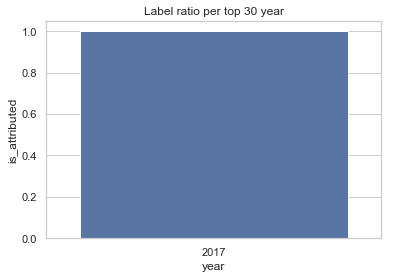

In [30]:
VisualizeTopBar('year')

* 주로 저녁 ~ 밤 시간대에 이벤트 자주 발생 고르게 분포되어있는 편
* 다양한 날짜에서 수집한 게 아니여서 year, weekday 정보는 필요가 없어보임
* is_attributed == 0인 데이터와 같이 EDA 할 방법 생각 필요
* 대부분 categorical 변수들 Feature Engineering 감이 안 잡힘

In [31]:
## Saving parsed date file
outpath = os.path.join(root.replace('raw_data','preprocessed'))

df_train.to_csv(os.path.join(outpath,'train_parsed_date.csv'), index = False)
df_test.to_csv(os.path.join(outpath,'test_parsed_date.csv'), index = False)

Saving all is_attributed rows

In [37]:
df_train_all = pd.read_csv(os.path.join(root,train_fname) ,parse_dates=["click_time"])

In [42]:
file_name = 'train_is_attributed_all.csv'
df_train_attributed_all = df_train_all[df_train_all['is_attributed'] == 1]

df_train_attributed_all['click_time'] = pd.to_datetime(df_train_attributed_all['click_time'])
df_train_attributed_all['year'] = df_train_attributed_all.click_time.apply(lambda t: t.year)
df_train_attributed_all['weekday'] = df_train_attributed_all.click_time.apply(lambda t: t.weekday())
df_train_attributed_all['hour'] = df_train_attributed_all.click_time.apply(lambda t: t.hour)

df_train_attributed_all.to_csv(os.path.join(outpath,file_name) , index = False)

c:\program files\anaconda3\envs\cuda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
c:\program files\anaconda3\envs\cuda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
c:\program files\anaconda3\envs\cuda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [43]:
df_train_attributed_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456846 entries, 103 to 184882311
Data columns (total 11 columns):
ip                 456846 non-null int64
app                456846 non-null int64
device             456846 non-null int64
os                 456846 non-null int64
channel            456846 non-null int64
click_time         456846 non-null datetime64[ns]
attributed_time    456846 non-null object
is_attributed      456846 non-null int64
year               456846 non-null int64
weekday            456846 non-null int64
hour               456846 non-null int64
dtypes: datetime64[ns](1), int64(9), object(1)
memory usage: 41.8+ MB
